# 背景
使用机器学习创建一个模型，预测哪些乘客在泰坦尼克号沉船中幸存。

# 数据
## 1.总览数据并查看各特征下乘客存活的分布情况

In [50]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
data_train=pd.read_csv("train.csv")
data_train.info()
#总共891个数据，其中age和cabin有较多的缺失值

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [51]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [52]:
import matplotlib.pyplot as plt
#fig=plt.figure()
#fig.set(alpha=0.2)#设定图表颜色alpha值

plt.subplot2grid((2,3),(0,0))
data_train.Survived.value_counts().plot(kind='bar')
plt.title(u"survived")
plt.ylabel(u'mounts')

plt.subplot2grid((2,3),(0,1))
data_train.Pclass.value_counts().plot(kind='bar')
plt.title(u"grands distribute")
plt.ylabel(u"mounts")

plt.subplot2grid((2,3),(0,2))
plt.scatter(data_train.Survived,data_train.Age)
plt.ylabel(u"age")
plt.title(u"survived by age")

plt.subplot2grid((2,3),(1,0),colspan=2)
data_train.Age[data_train.Pclass==1].plot(kind='kde')
data_train.Age[data_train.Pclass==2].plot(kind='kde')
data_train.Age[data_train.Pclass==3].plot(kind='kde')
plt.xlabel(u'age')
plt.ylabel(u'density')
plt.title(u'grand')
plt.legend((u'first',u'second',u'third'),loc='best')

plt.subplot2grid((2,3),(1,2))
data_train.Embarked.value_counts().plot(kind='bar')
plt.title(u"aboard situation")
plt.ylabel(u"amounts")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

<function matplotlib.pyplot.show(*args, **kw)>

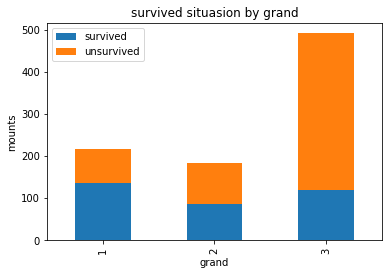

In [53]:
#fig=plt.figure()
#fig.set(alpha=0.2)

survived0 =data_train.Pclass[data_train.Survived==0].value_counts()
survived1 = data_train.Pclass[data_train.Survived==1].value_counts()
df = pd.DataFrame({u"survived":survived1,u'unsurvived':survived0})#dataframe 的属性是图例
df.plot(kind='bar',stacked=True)
plt.title('survived situasion by grand')
plt. xlabel('grand')
plt.ylabel('mounts')
plt.show

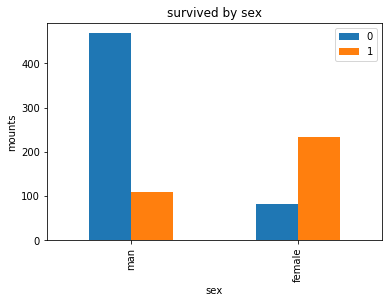

In [54]:
survivedman = data_train.Survived[data_train.Sex=='male'].value_counts()
survivedfe = data_train.Survived[data_train.Sex=='female'].value_counts()
df = pd.DataFrame({'man':survivedman,'female':survivedfe}).transpose()
df.plot(kind='bar')
plt.xlabel('sex')
plt.ylabel('mounts')
plt.title('survived by sex')
plt.show()

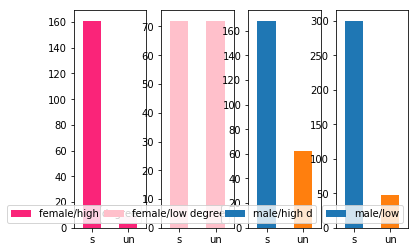

In [55]:
fig = plt.figure()
plt.title('survived by grand and sex')

ax1 = fig.add_subplot(141)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass!=3].value_counts().plot(kind='bar',label='fema',color='#FA2479')
ax1.set_xticklabels(['s','un'],rotation=0)
ax1.legend([u'female/high degree'],loc=4)

ax2 = fig.add_subplot(142)
data_train.Survived[data_train.Sex=='female'][data_train.Pclass==3].value_counts().plot(kind='bar',label='femalow',color='pink')
ax2.set_xticklabels(['s','un'],rotation=0)
ax2.legend(['female/low degree'],loc=4)

ax3 = plt.subplot2grid((1,4),(0,2))
data_train.Survived[data_train.Sex=='male'][data_train.Pclass!=3].value_counts().plot(kind='bar',label='man')
ax3.set_xticklabels(['s','un'],rotation=0)
ax3.legend(['male/high d'],loc=4)

ax4 = plt.subplot2grid((1,4),(0,3))
data_train.Survived[data_train.Sex=='male'][data_train.Pclass==3].value_counts().plot(kind='bar',label='man')
ax4.set_xticklabels(['s','un'],rotation=0)
ax4.legend(['male/low'],loc=4)

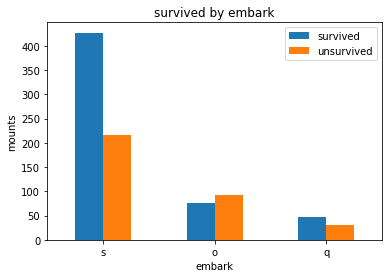

In [56]:
#各港口获救情况
survived0 = data_train.Embarked[data_train.Survived==0].value_counts()
survived1 = data_train.Embarked[data_train.Survived==1].value_counts()
df = pd.DataFrame({'survived':survived0,'unsurvived':survived1})
draw = df.plot(kind='bar')
plt.title('survived by embark')
plt.xlabel('embark')
plt.ylabel('mounts')
draw.set_xticklabels(['s','o','q'],rotation=0)
plt.show()

[Text(0, 0, 'not null'), Text(0, 0, 'is null')]

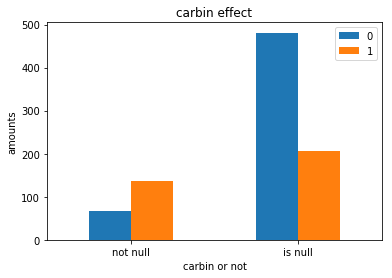

In [57]:
#看cabin的影响
survived0=data_train.Survived[pd.notnull(data_train.Cabin)].value_counts()
survived1=data_train.Survived[pd.isnull(data_train.Cabin)].value_counts()
df=pd.DataFrame({'notnull':survived0,'isnull':survived1}).transpose()
draw=df.plot(kind='bar')
plt.xlabel('carbin or not')
plt.ylabel('amounts')
plt.title('carbin effect')
draw.set_xticklabels(['not null','is null'],rotation=0)

## 2.数据处理
+ 缺失值补齐(randomforest)
+ 非数值特征数值化
+ 年龄和票价标准化
+ 年龄、票价、姓氏离散化
+ 新建特征family size

In [144]:
#用随机森林的方法将年龄等缺失值补齐
import re
import numpy as np
import pandas as pd
from pandas import Series,DataFrame


data_train = pd.read_csv("train.csv")
from sklearn.ensemble import RandomForestRegressor
def fillage(df):
    age_df = df[['Age','Fare','Parch','SibSp','Pclass']]
    
    knowage = age_df[age_df.Age.notnull()].values
    unknowage = age_df[age_df.Age.isnull()].values
    
    y = knowage[:,0]
    x = knowage[:,1:]
    rfr = RandomForestRegressor(random_state=0,n_estimators=2000,n_jobs=-1)
    rfr.fit(x,y)
    
    predictage = rfr.predict(unknowage[:,1::])
    df.loc[(df.Age.isnull()),'Age']=predictage
    return df,rfr
def get_cabin(cabin):
    fetch_cabin = re.search('^[A-Z]',cabin)
    if fetch_cabin:
        return fetch_cabin.group(0)
    return " "

def fillcabin(df):
    df['newcabin'] = df['Cabin']
    df1 = df[df.Cabin.notnull()]
    df.loc[(df.Cabin.isnull()),'Cabin'] = 'no'
    
    cabin = df1['Cabin'].apply(get_cabin)
    df['newcabin'] = cabin
    df.loc[(df.newcabin.isnull()),'newcabin'] = 'no'
    return df
data_train,rfr = fillage(data_train)
data_train = fillcabin(data_train)
#data_train.head(20)
#df1.head()

In [145]:
#将非数值属性数值化
dummies_cabin = pd.get_dummies(data_train['newcabin'],prefix='Cabin')
dummies_embark = pd.get_dummies(data_train['Embarked'],prefix='Embarked')
dummies_pclass = pd.get_dummies(data_train['Pclass'],prefix='Pclass')
dummies_sex = pd.get_dummies(data_train['Sex'],prefix='Sex')

df = pd.concat([data_train,dummies_cabin,dummies_embark,dummies_pclass,dummies_sex],axis=1)
df.drop(['Cabin','Pclass','Ticket','Embarked','Sex'],axis=1,inplace=True)
#df.info()


In [146]:
#将 年龄和票价标准化
import sklearn.preprocessing as preprocessing
scaler = preprocessing.StandardScaler()

age_scaler = scaler.fit(df['Age'].values.reshape(-1,1))
df['Age_scale'] = scaler.fit_transform(df['Age'].values.reshape(-1,1),age_scaler)

farescare = scaler.fit(df['Fare'].values.reshape(-1,1))
#df['Fare_scare']=scaler.fit_transform(df['Fare'].values.reshape(-1,1),farescare)
#df.info()


In [147]:
data_test = pd.read_csv('test.csv')

#年龄补充
df1 = data_test[['Age','Pclass','SibSp','Parch','Fare']]
unknowage = df1[df1.Age.isnull()].values
x = unknowage[:,1:]
predictage = rfr.predict(x)
data_test.loc[(data_test.Age.isnull()),'Age']=predictage
df2 = data_test[['Fare']]
fare = df2[df2.Fare.notnull()].values.mean()
#票价补充
data_test.loc[(data_test.Fare.isnull()),'Fare'] = fare


#有无carbin
data_test = fillcabin(data_test)


#属性值转换cabin embarked sex pclass
dummies_Cabin = pd.get_dummies(data_test['newcabin'],prefix='Cabin')
dummies_Embarked = pd.get_dummies(data_test['Embarked'],prefix='Embarked')
dummies_sex = pd.get_dummies(data_test['Sex'],prefix='Sex' )
dummies_pclass = pd.get_dummies(data_test['Pclass'],prefix='Pclass')
data_test = pd.concat([data_test,dummies_Cabin,dummies_pclass,dummies_sex,dummies_Embarked],axis=1)
data_test.drop(['Pclass','Sex','Embarked','Cabin'],axis=1,inplace=True)

#归一化
#df_test['Age_scaled'] = scaler.fit_transform(df_test['Age'].values.reshape(-1,1), age_scale_param)
#df_test['Fare_scaled'] = scaler.fit_transform(df_test['Fare'].values.reshape(-1,1), fare_scale_param)
#df_test.head()
data_test['Age_scaled']=scaler.fit_transform(data_test['Age'].values.reshape(-1,1),age_scaler)
#data_test['Fare_scaled']=scaler.fit_transform(data_test['Fare'].values.reshape(-1,1),farescare)
#from sklearn.preprocessing import Imputer
#Imputer().fit_transform(data_test.values)
#data_test.info()

In [148]:
#将年龄离散化
#data_df = data_train.filter(regex='Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
df['printage'] = df['Age']
df.loc[(df.printage<18),'Age'] = 'child'
df.loc[(df.printage>=18)&(df.printage<50),'Age'] = 'adult'
df.loc[(df.printage>=50),'Age'] = 'senior'
#df.head(20)
#df.describe()
#data_train.loc[data_train['Age'].values=18,'Age']='adlut


In [149]:
#将离散的年龄变量分类
dum_age = pd.get_dummies(df.Age,'Age')
df = pd.concat([df,dum_age],axis=1)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Fare,newcabin,Cabin_A,Cabin_B,...,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_scale,printage,Age_adult,Age_child,Age_senior
0,1,0,"Braund, Mr. Owen Harris",adult,1,0,7.2500,no,0,0,...,0,0,1,0,1,-0.561380,22.0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",adult,1,0,71.2833,C,0,0,...,1,0,0,1,0,0.613171,38.0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",adult,0,0,7.9250,no,0,0,...,0,0,1,1,0,-0.267742,26.0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",adult,1,0,53.1000,C,0,0,...,1,0,0,1,0,0.392942,35.0,1,0,0
4,5,0,"Allen, Mr. William Henry",adult,0,0,8.0500,no,0,0,...,0,0,1,0,1,0.392942,35.0,1,0,0


In [150]:
#data_test.head()将测试集的数据也离散化和分类
data_test['printage'] = data_test['Age']
data_test.loc[data_test.printage<18,"Age"] = "child"
data_test.loc[(data_test.printage>=18)&(data_test.printage<50),'Age'] = 'adult'
data_test.loc[data_test.printage>=50,"Age"] = "senior"

test_dum_age = pd.get_dummies(data_test.Age,'Age')
data_test = pd.concat([data_test,test_dum_age],axis=1)
data_test.head()


,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,newcabin,Cabin_A,Cabin_B,...,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Age_scaled,printage,Age_adult,Age_child,Age_senior
0,892,"Kelly, Mr. James",adult,0,0,330911,7.8292,no,0,0,...,0,1,0,1,0,0.404648,34.5,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",adult,1,0,363272,7.0000,no,0,0,...,1,0,0,0,1,1.373580,47.0,1,0,0
2,894,"Myles, Mr. Thomas Francis",senior,0,0,240276,9.6875,no,0,0,...,0,1,0,1,0,2.536298,62.0,0,0,1
3,895,"Wirz, Mr. Albert",adult,0,0,315154,8.6625,no,0,0,...,0,1,0,0,1,-0.176711,27.0,1,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",adult,1,1,3101298,12.2875,no,0,0,...,1,0,0,0,1,-0.564284,22.0,1,0,0


In [151]:
#将名字的姓分类
alldata=[df,data_test]

def get_title(name):
    title_search = re.search('([A-Za-z]+)\.',name)
    if title_search:
        return title_search.group(1)
    return " "
for dataset in alldata:
    dataset['Title'] = dataset['Name'].apply(get_title)
for dataset in alldata:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')


In [152]:
#将票价分类
for all_data in alldata:
    all_data.loc[all_data['Fare']<=7.91,'Fare'] = 0
    all_data.loc[(all_data['Fare']>7.91)&(all_data['Fare']<=14.454),'Fare'] = 1
    all_data.loc[(all_data['Fare']>14.454)&(all_data['Fare']<=31),'Fare'] = 2
    all_data.loc[all_data['Fare']>30,'Fare'] = 3
    all_data['Fare'] = all_data['Fare'].astype(int)

In [153]:
#新建特征familysiZe
for dataset in alldata:
    dataset['familysize'] = dataset['SibSp']+dataset['Parch']+1
    dataset['isnone'] = 0
    dataset.loc[(dataset['familysize']==1),'isnone'] = 1
fare_dum = pd.get_dummies(df['Fare'],prefix='Fare')
title_dum = pd.get_dummies(df['Title'],prefix='Title')
tes_fare_dum = pd.get_dummies(data_test['Fare'],prefix='Fare')
tes_title_dum = pd.get_dummies(data_test['Title'],prefix='Title')
data_test = pd.concat([data_test,tes_fare_dum,tes_title_dum],axis=1)
df = pd.concat([df,fare_dum,title_dum],axis=1)
data_test.drop(['Title','Fare'],axis=1,inplace=True)
df.drop(['Title','Fare'],axis=1,inplace=True)

# 模型
+ LR
+ Bagging
+ SVM


+ 1.LR

In [160]:
#LR
import matplotlib.pyplot as plt
fetch_train = df.filter(regex='Survived|isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
x_train = fetch_train.values[:,1:]
y_train = fetch_train.values[:,0]
#c=[1,2,3,4,5,6,7,8,9,10]
#lrscore1=[]
for i in range(1,11):
    lsage = linear_model.LogisticRegression(solver='liblinear',C=1,penalty='l1',tol=1e-6)
    lsage.fit(x_train,y_train)
    lrscore = round(lsage.score(x_train,y_train),2)
   # lrscore1.append(lrscore)
#plt.figure()
#plt.plot(c,lrscore1)
##plt.show()
#print(lrscore1)
print(lrscore)
pd.DataFrame({"columns":list(fetch_train.columns)[1:], "coef":list(lsage.coef_.T)})
    
    


0.84


,columns,coef
0,SibSp,[-0.5983672263921449]
1,Parch,[-0.3731981794594161]
2,Cabin_A,[0.0]
3,Cabin_B,[0.33161528453460504]
4,Cabin_C,[0.0]
5,Cabin_D,[0.6609141488271926]
6,Cabin_E,[1.0224663634291524]
7,Cabin_F,[0.15759300244193705]
8,Cabin_G,[0.0]
9,Embarked_C,[0.06889304021022158]


In [161]:
#交叉验证一下
from sklearn.model_selection import cross_val_score,train_test_split
cross_val_2 = df.filter(regex='Survived|isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
cross_x = cross_val_2.values[:,1:]
cross_y = cross_val_2.values[:,0]
cross_train_pro = linear_model.LogisticRegression(solver='liblinear',C=0.5,penalty='l1',tol=1e-6)
#cross_train_pro.fit(cross_x,cross_y)
print(cross_val_score(cross_train_pro,cross_x,cross_y,cv=10).mean())

0.8226801725116332


In [158]:
#使用测试集验证
fetch_test = data_test.filter(regex='isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
x_test = fetch_test.values[:,:]
prediction_2 = lsage.predict(x_test)
result_2 = DataFrame({'PassengerId':data_test.PassengerId,'Survived':prediction_2.astype(np.int32)})
result_2.to_csv('predictions_2.csv',index=False)



以上将年龄离散化使正确率提高了百分之二为61%
然后将细化cabin属性，正确率提高至65%

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


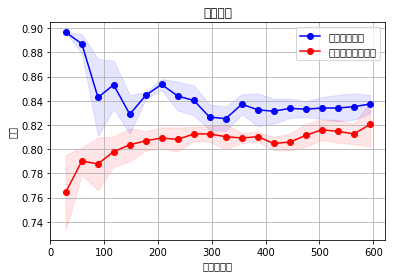

(0.8234769148997283, 0.04271029765647161)

In [162]:
import numpy as np
import matplotlib.pyplot as plt
# from sklearn.learning_curve import learning_curve  修改以fix learning_curve DeprecationWarning
from sklearn.model_selection import learning_curve

# 用sklearn的learning_curve得到training_score和cv_score，使用matplotlib画出learning curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()
    
        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")
    
        plt.legend(loc="best")
        
        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()
    
    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(lsage, u"学习曲线",x_train, y_train)


+ 2.Bagging

In [189]:
from sklearn.ensemble import BaggingRegressor

bag = df.filter(regex='Survived|isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare_.*|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
# y即Survival结果
bag_x = bag.values[:,1:]
bag_y = bag.values[:,0]

# X即特征属性值


# fit到BaggingRegressor之中
clf = linear_model.LogisticRegression(C=10,penalty='l1', tol=1e-6)
bagging_clf = BaggingRegressor(clf, n_estimators=20, max_samples=0.8, max_features=1.0, bootstrap=True, bootstrap_features=False, n_jobs=-1)
bagging_clf.fit(bag_x,bag_y)
bag_score = round(bagging_clf.score(bag_x,bag_y) * 100, 2)
print(bag_score)

test = data_test.filter(regex='isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare_.*|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
predictions = bagging_clf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("logistic_regression_bagging_predictions.csv", index=False)

39.22


+ 3.SVM

In [225]:
from sklearn import svm
from sklearn.model_selection import cross_val_score
fetch_train = df.filter(regex='Survived|isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare_.*|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
x_train = fetch_train.values[:,1:]
y_train = fetch_train.values[:,0]

trysvm = svm.SVC(gamma='scale',C=0.2)
trysvm.fit(x_train,y_train)
svm_score = round(trysvm.score(x_train,y_train)*100,2)
print(svm_score)
print(cross_val_score(trysvm,x_train,y_train,cv=5).mean())

test = data_test.filter(regex='isnone|Title|Age_adult|Age_child|Age_senior|SibSp|Parch|Fare_.*|Cabin_A|Cabin_B|Cabin_C|Cabin_D|Cabin_E|Cabin_F|Cabin_G|Embarked_.*|Sex_.*|Pclass_.*')
predictions = trysvm.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("svm.csv", index=False)
#测试分数76

83.16
0.819299862010854
